In [7]:
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np

In [8]:
url = 'https://raw.githubusercontent.com/LuzEva/DS2/refs/heads/main/rotten_tomatoes_movies.csv'
df1 = pd.read_csv(url)
df1.head()


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [9]:
df1_ok = df1.drop(['critics_consensus', 'content_rating', 'directors', 'authors', 'actors', 'production_company', 'rotten_tomatoes_link', 'movie_info', 'tomatometer_count', 'audience_status', 'audience_count', 'streaming_release_date', 'runtime', 'genres', 'tomatometer_top_critics_count'], axis=1)
df1_ok.head()


,movie_title,original_release_date,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,2010-02-12,Rotten,49.0,53.0,73,76
1,Please Give,2010-04-30,Certified-Fresh,87.0,64.0,123,19
2,10,1979-10-05,Fresh,67.0,53.0,16,8
3,12 Angry Men (Twelve Angry Men),1957-04-13,Certified-Fresh,100.0,97.0,54,0
4,"20,000 Leagues Under The Sea",1954-01-01,Fresh,89.0,74.0,24,3


Comenzamos eliminando todos los datos en el dataset de críticas que serán irrelevantes para nuestro análisis, así podremos agilizar más y completar con las datos que concatenaremos con el dataset de recaudaciones.

In [10]:
df1_ord = df1_ok.sort_values(by= 'movie_title', ignore_index=True)
df1_ord

,movie_title,original_release_date,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,!Women Art Revolution,2011-06-01,Fresh,84.0,60.0,21,4
1,#Horror,2015-11-20,Rotten,46.0,9.0,6,7
2,#Unfit: The Psychology of Donald Trump,2020-08-28,Fresh,85.0,70.0,22,4
3,$ (Dollars) (The Heist),1971-12-15,Fresh,86.0,51.0,6,1
4,$9.99,2008-09-04,Certified-Fresh,73.0,55.0,40,15
...,...,...,...,...,...,...,...
17707,xXx: Return of Xander Cage,2017-01-20,Rotten,45.0,37.0,66,82
17708,xXx: State of the Union,2005-04-29,Rotten,17.0,32.0,23,115
17709,Átame! (Tie Me Up! Tie Me Down!),1990-01-22,Fresh,67.0,79.0,20,10
17710,Évocateur: The Morton Downey Jr. Movie,2013-06-07,Fresh,91.0,84.0,30,3


Luego de ordenar el primer DF por el nombre de películas, agregaremos el segundo DF para analizar la comparativa.

In [11]:
url2= 'https://raw.githubusercontent.com/LuzEva/DS2/refs/heads/main/Mojo_budget_update.csv'
df2 = pd.read_csv(url2)
df2.head()

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,May 25,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,...,Thomas F. Wilson,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,https://www.boxofficemojo.com/title/tt0099088/...
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,December 22,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,...,Kim Cattrall,47000000.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0099165/...
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,November 9,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,...,Rodney A. Grant,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN,https://www.boxofficemojo.com/title/tt0099348/...
3,tt0099422,Dick Tracy,1990,The comic strip detective finds his life vastl...,NaN,June 15,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Chester Gould,...,Charlie Korsmo,47000000.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music,https://www.boxofficemojo.com/title/tt0099422/...
4,tt0099423,Die Hard 2,1990,John McClane attempts to avert disaster as rog...,NaN,July 6,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Walter Wager,...,Reginald VelJohnson,70000000.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN,https://www.boxofficemojo.com/title/tt0099423/...


In [12]:
df2_ok = df2.drop(['movie_id', 'year', 'trivia', 'mpaa', 'release_date', 'director', 'writer', 'producer', 'composer', 'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4', 'html' ], axis=1)
df2_ok.head()

,title,run_time,distributor,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,Back to the Future Part III,1 hr 58 min,Universal Pictures,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,The Bonfire of the Vanities,2 hr 5 min,Warner Bros.,47000000.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,Dances with Wolves,3 hr 1 min,Orion Pictures,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,Dick Tracy,1 hr 45 min,Walt Disney Studios Motion Pictures,47000000.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,Die Hard 2,2 hr 4 min,Twentieth Century Fox,70000000.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN


In [13]:
df2_ord = df2_ok.sort_values(by= 'title', ignore_index=True)
df2_ord

,title,run_time,distributor,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,10 Things I Hate About You,1 hr 37 min,Walt Disney Studios Motion Pictures,30000000.0,38178166.0,15300000.0,53478166.0,Comedy,Drama,Romance,NaN
1,"10,000 BC",1 hr 49 min,Warner Bros.,105000000.0,94784201.0,175000000.0,269784201.0,Action,Adventure,Drama,Fantasy
2,102 Dalmatians,1 hr 40 min,Walt Disney Studios Motion Pictures,85000000.0,66957026.0,116654745.0,183611771.0,Adventure,Comedy,Family,NaN
3,10th & Wolf,1 hr 47 min,THINKFilm,8000000.0,54702.0,88749.0,143451.0,Crime,Drama,Thriller,NaN
4,12 Years a Slave,2 hr 14 min,Fox Searchlight Pictures,20000000.0,56671993.0,131061209.0,187733202.0,Biography,Drama,History,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3238,Zyzzyx Rd,1 hr 30 min,Regent Releasing,2000000.0,30.0,NaN,30.0,Crime,Drama,Thriller,NaN
3239,eXistenZ,1 hr 37 min,Miramax,15000000.0,2856712.0,NaN,2856712.0,Horror,Sci-Fi,Thriller,NaN
3240,xXx,2 hr 4 min,Revolution Studios,70000000.0,142109382.0,135339000.0,277448382.0,Action,Adventure,Thriller,NaN
3241,xXx: Return of Xander Cage,1 hr 47 min,Paramount Pictures,85000000.0,44898413.0,301219864.0,346118277.0,Action,Adventure,Thriller,NaN


In [14]:
df1 = df1_ord.rename(columns={'movie_title' : 'title'})
df1.head()                     

,title,original_release_date,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,!Women Art Revolution,2011-06-01,Fresh,84.0,60.0,21,4
1,#Horror,2015-11-20,Rotten,46.0,9.0,6,7
2,#Unfit: The Psychology of Donald Trump,2020-08-28,Fresh,85.0,70.0,22,4
3,$ (Dollars) (The Heist),1971-12-15,Fresh,86.0,51.0,6,1
4,$9.99,2008-09-04,Certified-Fresh,73.0,55.0,40,15


In [15]:
df2 = df2_ord
df2.head()

,title,run_time,distributor,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,10 Things I Hate About You,1 hr 37 min,Walt Disney Studios Motion Pictures,30000000.0,38178166.0,15300000.0,53478166.0,Comedy,Drama,Romance,NaN
1,"10,000 BC",1 hr 49 min,Warner Bros.,105000000.0,94784201.0,175000000.0,269784201.0,Action,Adventure,Drama,Fantasy
2,102 Dalmatians,1 hr 40 min,Walt Disney Studios Motion Pictures,85000000.0,66957026.0,116654745.0,183611771.0,Adventure,Comedy,Family,NaN
3,10th & Wolf,1 hr 47 min,THINKFilm,8000000.0,54702.0,88749.0,143451.0,Crime,Drama,Thriller,NaN
4,12 Years a Slave,2 hr 14 min,Fox Searchlight Pictures,20000000.0,56671993.0,131061209.0,187733202.0,Biography,Drama,History,NaN


Luego de ordenar el DF2 con las recaudaciones de las películas y de renombrar la columna clave entre ambos. Vamos a concatenar ambos Df para cear uno nuevo. Hacemos un inner para despreciar toda fila que no coincida, ya que es irrelavante para comprar sí nos faltan datos de criticas y/o recaudaciones.

In [16]:
df3= pd.merge(df1, df2, on='title', how='inner')
df3.head()

,title,original_release_date,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,run_time,distributor,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,10 Things I Hate About You,1999-03-31,Fresh,69.0,69.0,54,24,1 hr 37 min,Walt Disney Studios Motion Pictures,30000000.0,38178166.0,15300000.0,53478166.0,Comedy,Drama,Romance,NaN
1,102 Dalmatians,2000-11-22,Rotten,31.0,32.0,28,62,1 hr 40 min,Walt Disney Studios Motion Pictures,85000000.0,66957026.0,116654745.0,183611771.0,Adventure,Comedy,Family,NaN
2,10th & Wolf,2006-08-18,Rotten,19.0,52.0,5,22,1 hr 47 min,THINKFilm,8000000.0,54702.0,88749.0,143451.0,Crime,Drama,Thriller,NaN
3,12 Years a Slave,2013-10-18,Certified-Fresh,95.0,90.0,348,17,2 hr 14 min,Fox Searchlight Pictures,20000000.0,56671993.0,131061209.0,187733202.0,Biography,Drama,History,NaN
4,127 Hours,2010-11-05,Certified-Fresh,93.0,85.0,219,16,1 hr 34 min,Fox Searchlight Pictures,18000000.0,18335230.0,42403567.0,60738797.0,Biography,Drama,NaN,NaN


In [17]:
print("Dimensiones de df1:", df1.shape)  
print("Dimensiones de df2:", df2.shape)  
print("Dimensiones de df3:", df3.shape)  

Dimensiones de df1: (17712, 7)
Dimensiones de df2: (3243, 11)
Dimensiones de df3: (3118, 17)


Como podemos ver, el DF2 (sobre las recaudaciones), tiene menos filas por ello, se reduce drásticamente la cantidad de datos del DF1 cuando lo concatenamos. 
Vamos a limpiar las columnas que parecen irrelevante para el análisis del DF3.

In [18]:
df3_limpio =  df3.drop(['title', 'run_time',  'distributor', 'genre_2', 'genre_3', 'genre_4'], axis=1)
df3_limpio.head()

,original_release_date,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,budget,domestic,international,worldwide,genre_1
0,1999-03-31,Fresh,69.0,69.0,54,24,30000000.0,38178166.0,15300000.0,53478166.0,Comedy
1,2000-11-22,Rotten,31.0,32.0,28,62,85000000.0,66957026.0,116654745.0,183611771.0,Adventure
2,2006-08-18,Rotten,19.0,52.0,5,22,8000000.0,54702.0,88749.0,143451.0,Crime
3,2013-10-18,Certified-Fresh,95.0,90.0,348,17,20000000.0,56671993.0,131061209.0,187733202.0,Biography
4,2010-11-05,Certified-Fresh,93.0,85.0,219,16,18000000.0,18335230.0,42403567.0,60738797.0,Biography


In [19]:
df3 = df3_limpio

In [20]:
nan_por_columna_df3= df3.isna().sum()
print(nan_por_columna_df3)



original_release_date                33
tomatometer_status                    2
tomatometer_rating                    2
audience_rating                       7
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
budget                                0
domestic                              6
international                       321
worldwide                             3
genre_1                               0
dtype: int64


Al verificar las columanas que tienen más NaN, vamos a determinar cuales de esos datos deben ser eliminados y cuáles modificados en funcion de los datos que debemos analizar.
Las columnas que son "tomatometer" deberían tener datos asignados, sí tiene valores nulos, eliminamos de la fila esas películas.
Otra indispensable es la columna "worldwide" que identifica la recaudación total de las películas, sí tienen nan, deben eliminarse.
Directores, fechas de estreno y distribuidores dejaremos los NaN.
Y en las recaudaciones domesticas e internacionales, cambiaremos el valor a 0.

In [21]:
df3_sin_nan= df3.dropna(subset=['tomatometer_status', 'tomatometer_rating', 'worldwide'])   
df3_sin_nan.shape

(3113, 11)

In [22]:
nan_por_columna_df3= df3_sin_nan.isna().sum()
print(nan_por_columna_df3)



original_release_date                32
tomatometer_status                    0
tomatometer_rating                    0
audience_rating                       5
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
budget                                0
domestic                              3
international                       318
worldwide                             0
genre_1                               0
dtype: int64


In [23]:
df_reemplazo = df3_sin_nan.fillna({'domestic':0, 'international':0})
df_reemplazo.isna().sum()


original_release_date               32
tomatometer_status                   0
tomatometer_rating                   0
audience_rating                      5
tomatometer_fresh_critics_count      0
tomatometer_rotten_critics_count     0
budget                               0
domestic                             0
international                        0
worldwide                            0
genre_1                              0
dtype: int64

Nos quedan valores NaN en el rating de audiencia. Este dato, al no ser tan determinante como los tomatometer, vamos a reemplazarlos con una media de esa columna para asignarles un valor que nos pueda ayudar al momento de tener la necesidad de utilizar ese dato.

In [24]:
df_reemplazo['audience_rating'] = df_reemplazo['audience_rating'].fillna(df_reemplazo['audience_rating'].mean())
df_reemplazo.isna().sum()

original_release_date               32
tomatometer_status                   0
tomatometer_rating                   0
audience_rating                      0
tomatometer_fresh_critics_count      0
tomatometer_rotten_critics_count     0
budget                               0
domestic                             0
international                        0
worldwide                            0
genre_1                              0
dtype: int64

In [25]:
df_reemplazo = df3

In [26]:
df3.columns = ['Fecha de lanzamiento', 'Aprobación de la critica', 'Puntaje medio críticas', 'Puntaje de audiencia', 'TBC', 'TMC', 'Presupuesto', 'RD', 'RI', 'RT', 'Género']
df3.head()

,Fecha de lanzamiento,Aprobación de la critica,Puntaje medio críticas,Puntaje de audiencia,TBC,TMC,Presupuesto,RD,RI,RT,Género
0,1999-03-31,Fresh,69.0,69.0,54,24,30000000.0,38178166.0,15300000.0,53478166.0,Comedy
1,2000-11-22,Rotten,31.0,32.0,28,62,85000000.0,66957026.0,116654745.0,183611771.0,Adventure
2,2006-08-18,Rotten,19.0,52.0,5,22,8000000.0,54702.0,88749.0,143451.0,Crime
3,2013-10-18,Certified-Fresh,95.0,90.0,348,17,20000000.0,56671993.0,131061209.0,187733202.0,Biography
4,2010-11-05,Certified-Fresh,93.0,85.0,219,16,18000000.0,18335230.0,42403567.0,60738797.0,Biography


Renombramos las columnas para poder trabajar mejor en las comparaciones de los datos. 
Las siglas significan:
'TBC': Total Buenas Criticas
'TMC': Total Malas Criticas
'RD': Recaudación Doméstica
'RI': Recaudación Internacional
'RT': Recaudación Total

In [27]:
df3.dtypes

Fecha de lanzamiento         object
Aprobación de la critica     object
Puntaje medio críticas      float64
Puntaje de audiencia        float64
TBC                           int64
TMC                           int64
Presupuesto                 float64
RD                          float64
RI                          float64
RT                          float64
Género                       object
dtype: object

In [28]:
df3['Fecha de lanzamiento'] = pd.to_datetime(df3['Fecha de lanzamiento'])
df3.dtypes

Fecha de lanzamiento        datetime64[ns]
Aprobación de la critica            object
Puntaje medio críticas             float64
Puntaje de audiencia               float64
TBC                                  int64
TMC                                  int64
Presupuesto                        float64
RD                                 float64
RI                                 float64
RT                                 float64
Género                              object
dtype: object

Con el nuevo DataFrame ya limpio, vamos a verificar las siguientes hipótesis que se plantean:

1.Impacto de las Críticas en la Recaudación: Se podría hipotetizar que las películas con mejores críticas, tanto especializadas como del público, tienen una mayor recaudación en taquilla. Esta hipótesis podría analizarse comparando las calificaciones de las críticas con las cifras de recaudación, tanto doméstica como internacional, para ver si existe una relación entre la recepción crítica y el rendimiento económico de las películas.

2.Relación entre Presupuesto y Recaudación: Se podría investigar si las películas con mayores presupuestos tienden a generar mayores ingresos, tanto en el mercado doméstico como internacional. Este análisis ayudaría a comprender cómo la inversión en producción de una película se traduce en ingresos en taquilla.

3.Críticas vs. Presupuesto: Podría hipotetizarse que el presupuesto de una película está relacionado con la recepción crítica de la misma. Este análisis permitiría explorar si las películas con un presupuesto más alto tienden a recibir mejores críticas, tanto de los especialistas como del público, independientemente de su desempeño en taquilla. Además, se podría investigar si el mayor presupuesto se traduce en una mejor calidad percibida por los críticos y la audiencia, ya sea por los efectos visuales, la calidad de la producción o el elenco.

4.Críticas vs. Recaudación según Género: Se podría hipotetizar que la relación entre las críticas y la recaudación de una película varía según el género al que pertenece. Este análisis permitiría explorar si ciertos géneros, como los de acción o ciencia ficción, tienden a generar mayores ingresos en taquilla independientemente de las críticas recibidas, mientras que otros géneros, como los dramas o películas independientes, pueden estar más influenciados por las críticas especializadas y del público. Así, se podría investigar si las películas de ciertos géneros son más sensibles a las opiniones críticas y cómo esto afecta su desempeño en taquilla tanto a nivel doméstico como internacional.

Para ello vamos a generar una nueva variable en el DF3 que agrupe los puntajes de la crítica especializada como las del público.

In [29]:
df3['Promedio Crítica'] = df3[['Puntaje medio críticas', 'Puntaje de audiencia']].mean(axis=1)
df3.head()

,Fecha de lanzamiento,Aprobación de la critica,Puntaje medio críticas,Puntaje de audiencia,TBC,TMC,Presupuesto,RD,RI,RT,Género,Promedio Crítica
0,1999-03-31,Fresh,69.0,69.0,54,24,30000000.0,38178166.0,15300000.0,53478166.0,Comedy,69.0
1,2000-11-22,Rotten,31.0,32.0,28,62,85000000.0,66957026.0,116654745.0,183611771.0,Adventure,31.5
2,2006-08-18,Rotten,19.0,52.0,5,22,8000000.0,54702.0,88749.0,143451.0,Crime,35.5
3,2013-10-18,Certified-Fresh,95.0,90.0,348,17,20000000.0,56671993.0,131061209.0,187733202.0,Biography,92.5
4,2010-11-05,Certified-Fresh,93.0,85.0,219,16,18000000.0,18335230.0,42403567.0,60738797.0,Biography,89.0


In [30]:
df3.isna().sum()

Fecha de lanzamiento         33
Aprobación de la critica      2
Puntaje medio críticas        2
Puntaje de audiencia          7
TBC                           0
TMC                           0
Presupuesto                   0
RD                            6
RI                          321
RT                            3
Género                        0
Promedio Crítica              2
dtype: int64

In [31]:
df_reemplazo2 = df3.fillna({'RD':0, 'RI':0})
df_reemplazo2 .isna().sum()

Fecha de lanzamiento        33
Aprobación de la critica     2
Puntaje medio críticas       2
Puntaje de audiencia         7
TBC                          0
TMC                          0
Presupuesto                  0
RD                           0
RI                           0
RT                           3
Género                       0
Promedio Crítica             2
dtype: int64

In [32]:
df3_sin_nan = df_reemplazo2.dropna(subset=['Aprobación de la critica', 'Puntaje medio críticas', 'RT']).copy()
df3_sin_nan['Puntaje de audiencia'] = df3_sin_nan['Puntaje de audiencia'].fillna(df3_sin_nan['Puntaje de audiencia'].mean())
df3_sin_nan.isna().sum()

Fecha de lanzamiento        32
Aprobación de la critica     0
Puntaje medio críticas       0
Puntaje de audiencia         0
TBC                          0
TMC                          0
Presupuesto                  0
RD                           0
RI                           0
RT                           0
Género                       0
Promedio Crítica             0
dtype: int64

In [33]:
df3=df3_sin_nan
df3.head()

,Fecha de lanzamiento,Aprobación de la critica,Puntaje medio críticas,Puntaje de audiencia,TBC,TMC,Presupuesto,RD,RI,RT,Género,Promedio Crítica
0,1999-03-31,Fresh,69.0,69.0,54,24,30000000.0,38178166.0,15300000.0,53478166.0,Comedy,69.0
1,2000-11-22,Rotten,31.0,32.0,28,62,85000000.0,66957026.0,116654745.0,183611771.0,Adventure,31.5
2,2006-08-18,Rotten,19.0,52.0,5,22,8000000.0,54702.0,88749.0,143451.0,Crime,35.5
3,2013-10-18,Certified-Fresh,95.0,90.0,348,17,20000000.0,56671993.0,131061209.0,187733202.0,Biography,92.5
4,2010-11-05,Certified-Fresh,93.0,85.0,219,16,18000000.0,18335230.0,42403567.0,60738797.0,Biography,89.0


In [34]:
columnas_a_convertir= ['Puntaje medio críticas', 'Puntaje de audiencia', 'Presupuesto', 'RD', 'RI', 'RT', 'Promedio Crítica']
df3[columnas_a_convertir]= df3[columnas_a_convertir].astype(int)
df3.head()

,Fecha de lanzamiento,Aprobación de la critica,Puntaje medio críticas,Puntaje de audiencia,TBC,TMC,Presupuesto,RD,RI,RT,Género,Promedio Crítica
0,1999-03-31,Fresh,69,69,54,24,30000000,38178166,15300000,53478166,Comedy,69
1,2000-11-22,Rotten,31,32,28,62,85000000,66957026,116654745,183611771,Adventure,31
2,2006-08-18,Rotten,19,52,5,22,8000000,54702,88749,143451,Crime,35
3,2013-10-18,Certified-Fresh,95,90,348,17,20000000,56671993,131061209,187733202,Biography,92
4,2010-11-05,Certified-Fresh,93,85,219,16,18000000,18335230,42403567,60738797,Biography,89


In [35]:
más_recaudacion = df3.loc[df3['RT'].idxmax()]
print(más_recaudacion)

Fecha de lanzamiento        2019-04-26 00:00:00
Aprobación de la critica        Certified-Fresh
Puntaje medio críticas                       94
Puntaje de audiencia                         90
TBC                                         495
TMC                                          34
Presupuesto                           356000000
RD                                    858373000
RI                                   1939427564
RT                                   2797800564
Género                                   Action
Promedio Crítica                             92
Name: 231, dtype: object


Ahora voy a generar una variable que compare el presupuesto con la recaudación total de la película para saber sí es rentable o no. Debido a fuentes no oficiales de la industria, se estima que las grandes películas gastan casi lo mismo que su presupeusto en publicidad. Por eso, vamos a definir que una película empieza a tener una "buena rentabilidad" a partir que la recaudación supere el 200% de su presupuesto.

In [36]:
# Primero, calculamos el porcentaje de recaudación respecto al presupuesto
df3['Porcentaje Recaudacion'] = ((df3['RT'] / df3['Presupuesto']) * 100).round(2)
df3.head()

,Fecha de lanzamiento,Aprobación de la critica,Puntaje medio críticas,Puntaje de audiencia,TBC,TMC,Presupuesto,RD,RI,RT,Género,Promedio Crítica,Porcentaje Recaudacion
0,1999-03-31,Fresh,69,69,54,24,30000000,38178166,15300000,53478166,Comedy,69,178.26
1,2000-11-22,Rotten,31,32,28,62,85000000,66957026,116654745,183611771,Adventure,31,216.01
2,2006-08-18,Rotten,19,52,5,22,8000000,54702,88749,143451,Crime,35,1.79
3,2013-10-18,Certified-Fresh,95,90,348,17,20000000,56671993,131061209,187733202,Biography,92,938.67
4,2010-11-05,Certified-Fresh,93,85,219,16,18000000,18335230,42403567,60738797,Biography,89,337.44


In [37]:
# Luego, se define una función para asignar el nivel de recaudación
def asignar_nivel_recaudacion(porcentaje):
    if porcentaje < 100:
        return 'Nula'
    elif 100 <= porcentaje < 120:
        return 'Baja'
    elif 120 <= porcentaje < 200:
        return 'Regular'
    elif 200 <= porcentaje < 300:
        return 'Buena'
    else:
        return 'Excelente'

In [38]:
df3['Nivel Recaudacion']= df3['Porcentaje Recaudacion'].apply(asignar_nivel_recaudacion)
df3.head()

,Fecha de lanzamiento,Aprobación de la critica,Puntaje medio críticas,Puntaje de audiencia,TBC,TMC,Presupuesto,RD,RI,RT,Género,Promedio Crítica,Porcentaje Recaudacion,Nivel Recaudacion
0,1999-03-31,Fresh,69,69,54,24,30000000,38178166,15300000,53478166,Comedy,69,178.26,Regular
1,2000-11-22,Rotten,31,32,28,62,85000000,66957026,116654745,183611771,Adventure,31,216.01,Buena
2,2006-08-18,Rotten,19,52,5,22,8000000,54702,88749,143451,Crime,35,1.79,Nula
3,2013-10-18,Certified-Fresh,95,90,348,17,20000000,56671993,131061209,187733202,Biography,92,938.67,Excelente
4,2010-11-05,Certified-Fresh,93,85,219,16,18000000,18335230,42403567,60738797,Biography,89,337.44,Excelente


In [39]:
orden_niveles = ['Nula', 'Baja', 'Regular', 'Buena', 'Excelente']
df3['Nivel Recaudacion'] = pd.Categorical(df3['Nivel Recaudacion'], categories=orden_niveles, ordered=True)

Ahora generamos un gráfico que compare las criticas con los niveles de recaudacion:

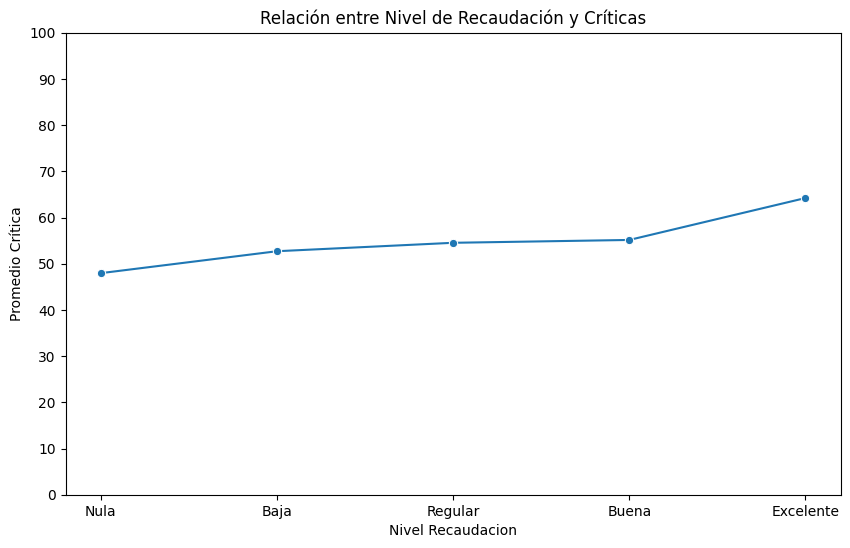

In [40]:
plt.figure(figsize=(10, 6))  
sns.lineplot(x='Nivel Recaudacion', y='Promedio Crítica' , data=df3, marker='o', errorbar=None)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 10))
plt.title("Relación entre Nivel de Recaudación y Críticas")
plt.show()

In [41]:
df_relacion = df3.groupby('Nivel Recaudacion')['Promedio Crítica'].mean().reset_index()
df_relacion.head()

C:\Users\Luz Eva\AppData\Local\Temp\ipykernel_12004\2247360554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_relacion = df3.groupby('Nivel Recaudacion')['Promedio Crítica'].mean().reset_index()


,Nivel Recaudacion,Promedio Crítica
0,Nula,47.962264
1,Baja,52.705882
2,Regular,54.529637
3,Buena,55.145283
4,Excelente,64.217006


Como vemos en este gráfico, la línea de regresión tiene una levemente pendiente positiva, lo cuál identifica que las críticas ayudan a definir cuál será la recaudación.  

Ahora, realizaremos un análisis multivariado, pero para ello, primero debo convertir Nivel de Recaudacion en valor integer

mapeo= {
    'Nula': 0,
    'Baja': 1,
    'Regular': 2,
    'Buena': 3,
    'Excelente': 4
}

df3['Nivel Recaudacion INT'] = df3['Nivel Recaudacion'].map(mapeo)
df3.head()

In [42]:
df3['Nivel Recaudacion'] = df3['Nivel Recaudacion'].astype('category').cat.codes
print(df3['Nivel Recaudacion'].dtype)

int8


In [43]:
print(df3.dtypes)

Fecha de lanzamiento        datetime64[ns]
Aprobación de la critica            object
Puntaje medio críticas               int64
Puntaje de audiencia                 int64
TBC                                  int64
TMC                                  int64
Presupuesto                          int64
RD                                   int64
RI                                   int64
RT                                   int64
Género                              object
Promedio Crítica                     int64
Porcentaje Recaudacion             float64
Nivel Recaudacion                     int8
dtype: object


Implementare el análisis multivariado tomando al Presupuesto como variable. El inconveniente es que tiene un rando que va desde los 6 mil doilares a los 356 millones de dolares. Entonces, vamos a tomar una muestra por cuartiles para definir outliers y quitarlos para ajustar el resultado.

In [44]:
Q1 = df3['Presupuesto'].quantile(0.25)
Q3 = df3['Presupuesto'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print("Q1 (Primer cuartil):", Q1)
print("Q3 (Tercer cuartil):", Q3)
print("IQR (Rango intercuartílico):", IQR)
print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)

Q1 (Primer cuartil): 16000000.0
Q3 (Tercer cuartil): 65000000.0
IQR (Rango intercuartílico): 49000000.0
Limite inferior: -57500000.0
Limite superior: 138500000.0


In [45]:
outliers = df3[(df3['Presupuesto'] < limite_inferior) | (df3['Presupuesto'] > limite_superior)]

print("Outliers detectados:\n", outliers)

Outliers detectados:
      Fecha de lanzamiento Aprobación de la critica  Puntaje medio críticas  \
12             2009-11-13                   Rotten                      39   
30             2013-12-25                   Rotten                      16   
42             1938-12-16                    Fresh                     100   
111            1992-11-11          Certified-Fresh                      95   
113            2019-05-24                   Rotten                      57   
...                   ...                      ...                     ...   
3087           2012-03-30                   Rotten                      27   
3091           2016-05-27                   Rotten                      47   
3092           2014-05-23          Certified-Fresh                      90   
3093           2011-06-03          Certified-Fresh                      86   
3094           2006-05-26                   Rotten                      57   

      Puntaje de audiencia  TBC  TMC  Pre

Como vemos, son 210 filas las afectadas por outliers de Presupuesto, vamos a eliminarlas para ajustar el análisi y que no nos generen problemas a la hora de encontrar un algoritmo que pueda predecir el nivel de rentabilidad de una película según su presupuesto y el puntaje de la crítica

In [46]:
df_sin_outliers = df3[(df3['Presupuesto'] < limite_inferior) | (df3['Presupuesto'] > limite_superior)]
print("DataFrame sin outliers:\n", df_sin_outliers)

DataFrame sin outliers:
      Fecha de lanzamiento Aprobación de la critica  Puntaje medio críticas  \
12             2009-11-13                   Rotten                      39   
30             2013-12-25                   Rotten                      16   
42             1938-12-16                    Fresh                     100   
111            1992-11-11          Certified-Fresh                      95   
113            2019-05-24                   Rotten                      57   
...                   ...                      ...                     ...   
3087           2012-03-30                   Rotten                      27   
3091           2016-05-27                   Rotten                      47   
3092           2014-05-23          Certified-Fresh                      90   
3093           2011-06-03          Certified-Fresh                      86   
3094           2006-05-26                   Rotten                      57   

      Puntaje de audiencia  TBC  TMC  

In [47]:
df_sin_outliers.describe()

,Fecha de lanzamiento,Puntaje medio críticas,Puntaje de audiencia,TBC,TMC,Presupuesto,RD,RI,RT,Promedio Crítica,Porcentaje Recaudacion,Nivel Recaudacion
count,210,210.000000,210.000000,210.000000,210.000000,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,210.000000,210.000000,210.000000
mean,2008-01-03 00:13:42.857142784,61.895238,66.914286,159.823810,85.809524,1.784438e+08,2.277670e+08,4.163371e+08,6.441041e+08,64.152381,353.992095,3.142857
min,1922-10-18 00:00:00,0.000000,15.000000,0.000000,0.000000,1.390000e+08,2.139276e+07,1.784092e+07,3.923368e+07,10.000000,26.160000,0.000000
25%,2006-11-06 12:00:00,39.000000,53.000000,74.000000,32.000000,1.500000e+08,1.142318e+08,2.032531e+08,3.225740e+08,46.250000,195.327500,2.000000
50%,2011-05-23 00:00:00,67.500000,69.000000,145.000000,76.500000,1.700000e+08,1.960434e+08,3.465668e+08,5.419710e+08,67.000000,305.940000,4.000000
75%,2015-10-30 00:00:00,84.750000,82.750000,226.000000,132.750000,2.000000e+08,3.165904e+08,5.288673e+08,8.286776e+08,81.750000,465.827500,4.000000
max,2020-01-17 00:00:00,100.000000,95.000000,495.000000,303.000000,3.560000e+08,9.366622e+08,2.029931e+09,2.797801e+09,95.000000,1177.400000,4.000000
std,NaN,25.847704,18.242972,108.735676,61.601683,3.432641e+07,1.551679e+08,3.060474e+08,4.439453e+08,20.789343,211.269701,1.075420


In [48]:
print("Dimensiones de df_sin_outliers:", df_sin_outliers.shape) 

Dimensiones de df_sin_outliers: (210, 14)


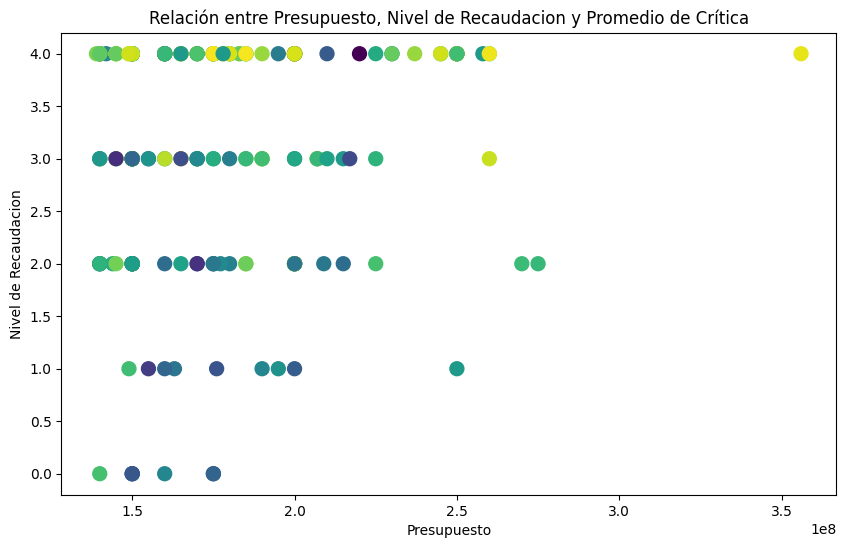

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(df_sin_outliers['Presupuesto'], df_sin_outliers['Nivel Recaudacion'], c=df_sin_outliers['Promedio Crítica'], cmap='viridis', s=100)
plt.title('Relación entre Presupuesto, Nivel de Recaudacion y Promedio de Crítica')
plt.xlabel('Presupuesto')
plt.ylabel('Nivel de Recaudacion')

plt.show()

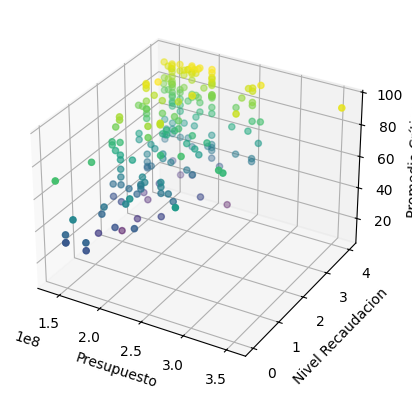

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df_sin_outliers['Presupuesto']  
y = df_sin_outliers['Nivel Recaudacion']  
z = df_sin_outliers['Promedio Crítica']  
ax.scatter(x, y, z, c=z, cmap='viridis')
ax.set_xlabel('Presupuesto')
ax.set_ylabel('Nivel Recaudacion')
ax.set_zlabel('Promedio Crítica')
plt.show()

In [51]:
var_presupuesto = df_sin_outliers['Presupuesto'].var()
var_recaudacion = df_sin_outliers['Nivel Recaudacion'].var()
var_critica = df_sin_outliers['Promedio Crítica'].var()
print("Varianza del Presupuesto:", var_presupuesto)
print("Varianza del Nivel de Reaudacion:", var_recaudacion)
print("Varianza del Promedio de Crítica:", var_critica)

Varianza del Presupuesto: 1178302760537707.8
Varianza del Nivel de Reaudacion: 1.1565276828434723
Varianza del Promedio de Crítica: 432.19676463886987


Como se puede observar, la varianza del Presupuesto es muy alta y esto puede traer un problema a la hora de tomar está variable en cuenta para generar un modelo predictivo. Probemos con la correlación de las varianzas para reconfirmarlo

In [52]:
correlacion = df_sin_outliers[['Presupuesto', 'Nivel Recaudacion', 'Promedio Crítica']].corr()
print("Correlación es:\n", correlacion)


Correlación es:
                    Presupuesto  Nivel Recaudacion  Promedio Crítica
Presupuesto           1.000000           0.129287          0.094195
Nivel Recaudacion     0.129287           1.000000          0.428113
Promedio Crítica      0.094195           0.428113          1.000000


Efectivamente, se confirma que la corelación entre Presupuesto y las otras variables es muy alejada de 1, por lo que nos entorpecera a la hora de elegir un modelo preictivo. Así que nos quedamos solo con el Nivel de Recaudacion y el Promedio de la Crítica.

In [53]:
correlacion = df3[['Nivel Recaudacion', 'Promedio Crítica']].corr()
print("Correlación es:\n", correlacion)

Correlación es:
                    Nivel Recaudacion  Promedio Crítica
Nivel Recaudacion           1.000000          0.284634
Promedio Crítica            0.284634          1.000000


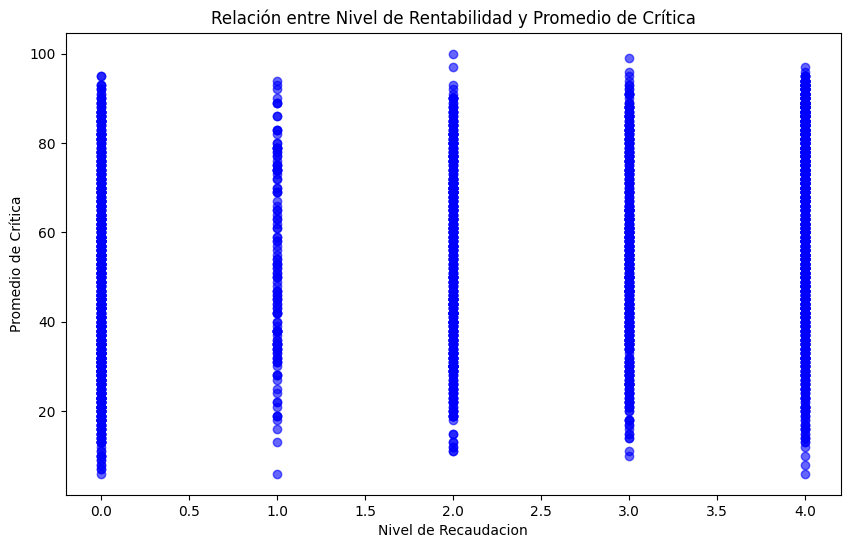

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['Nivel Recaudacion'], df3['Promedio Crítica'], color='blue', alpha=0.6)
plt.title('Relación entre Nivel de Rentabilidad y Promedio de Crítica')
plt.xlabel('Nivel de Recaudacion')
plt.ylabel('Promedio de Crítica')
plt.show()

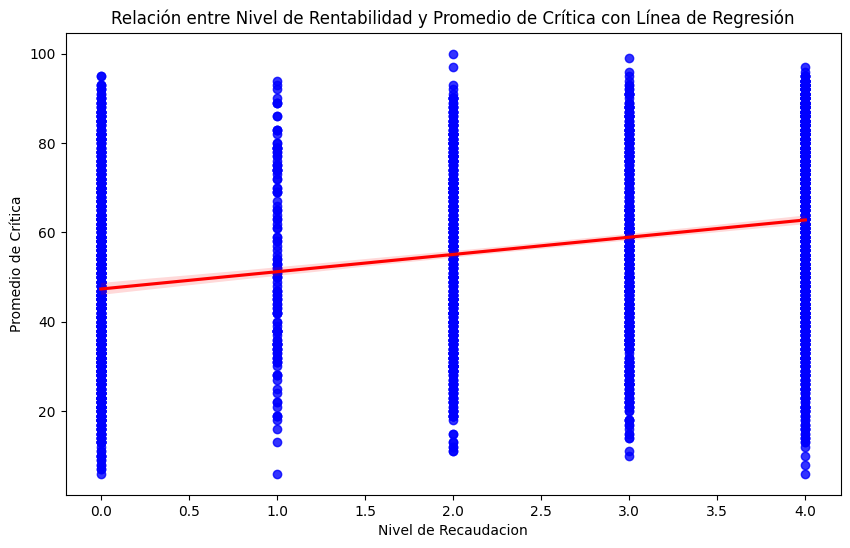

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Nivel Recaudacion', y='Promedio Crítica', data=df3, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relación entre Nivel de Rentabilidad y Promedio de Crítica con Línea de Regresión')
plt.xlabel('Nivel de Recaudacion')
plt.ylabel('Promedio de Crítica')
plt.show()

Como no puedo ajustar la relación entre las dos variables y los valores son muy dispesos como para poder crear un modelo de predectivo, antes de probar cualquier algoritmo, voy a generar una variable binaria para que me pueda decir sí una película es rentable o no es rentable. Los primeros 3 nivelos los tomo como no rentables y los últimos dos como rentables.

In [56]:
df3['Rentable'] = df3['Porcentaje Recaudacion'].apply(lambda x: 1 if x > 200 else 0)

df3.head()


,Fecha de lanzamiento,Aprobación de la critica,Puntaje medio críticas,Puntaje de audiencia,TBC,TMC,Presupuesto,RD,RI,RT,Género,Promedio Crítica,Porcentaje Recaudacion,Nivel Recaudacion,Rentable
0,1999-03-31,Fresh,69,69,54,24,30000000,38178166,15300000,53478166,Comedy,69,178.26,2,0
1,2000-11-22,Rotten,31,32,28,62,85000000,66957026,116654745,183611771,Adventure,31,216.01,3,1
2,2006-08-18,Rotten,19,52,5,22,8000000,54702,88749,143451,Crime,35,1.79,0,0
3,2013-10-18,Certified-Fresh,95,90,348,17,20000000,56671993,131061209,187733202,Biography,92,938.67,4,1
4,2010-11-05,Certified-Fresh,93,85,219,16,18000000,18335230,42403567,60738797,Biography,89,337.44,4,1


In [57]:
correlacion = df3['Rentable'].corr(df3['Promedio Crítica'])
print(f"Correlación entre Rentable y Promedio Crítica: {correlacion:.2f}")

correlacion_spearman = df3['Rentable'].corr(df3['Promedio Crítica'], method='spearman')
print(f"Correlación de Spearman entre Rentable y Promedio Crítica: {correlacion_spearman:.2f}")



Correlación entre Rentable y Promedio Crítica: 0.24
Correlación de Spearman entre Rentable y Promedio Crítica: 0.24


Las variables tienen una correlación positiva pero dista de ser perfecta.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [82]:
X= df3[['Promedio Crítica']]
y= df3['Rentable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 0.23038288770485926


In [83]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2}")

Coeficiente de Determinación (R²): 0.0706892556433244


In [84]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(f"Precisión: {accuracy_score(y_test, y_pred)}")


Precisión: 0.6099518459069021


Según las métricas aplicadas, el modelo de regresion lineal tiene muy bajo coeficiente para la cantidad de valores a predecir, 0 o 1. Así que interamos con otros algoritmos.

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Error cuadrático medio (MSE) con KNN: {mse_knn}")

Error cuadrático medio (MSE) con KNN: 0.2834670947030498


Se acerca a una predicción más acertada, pero probare con otro modelo que se acerque más a 1.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
                           

Precisión: 0.5971107544141252
              precision    recall  f1-score   support

           0       0.56      0.51      0.53       283
           1       0.62      0.67      0.64       340

    accuracy                           0.60       623
   macro avg       0.59      0.59      0.59       623
weighted avg       0.59      0.60      0.59       623



In [64]:
features= ['Presupuesto', 'RT', 'Género','Promedio Crítica', 'Porcentaje Recaudacion']
X= df3[features]
y= df3['Rentable']


X = pd.get_dummies(X, columns=['Género'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_selection import SelectKBest, f_classif

k = min(5, X_train.shape[1])  
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Precisión: 0.9775280898876404
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       283
           1       0.99      0.97      0.98       340

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

Características seleccionadas: Index(['Presupuesto', 'RT', 'Promedio Crítica', 'Género_Adventure',
       'Género_Horror'],
      dtype='object')


Sí bien este es el mejor resultado obtenido en cuánto a precision, el problema de agregar género deja fuera el resto de géneros cinematograficos, por lo cuál parece ser un sesgo. Y tome una variable que es impredecible como la Recaudación Total.

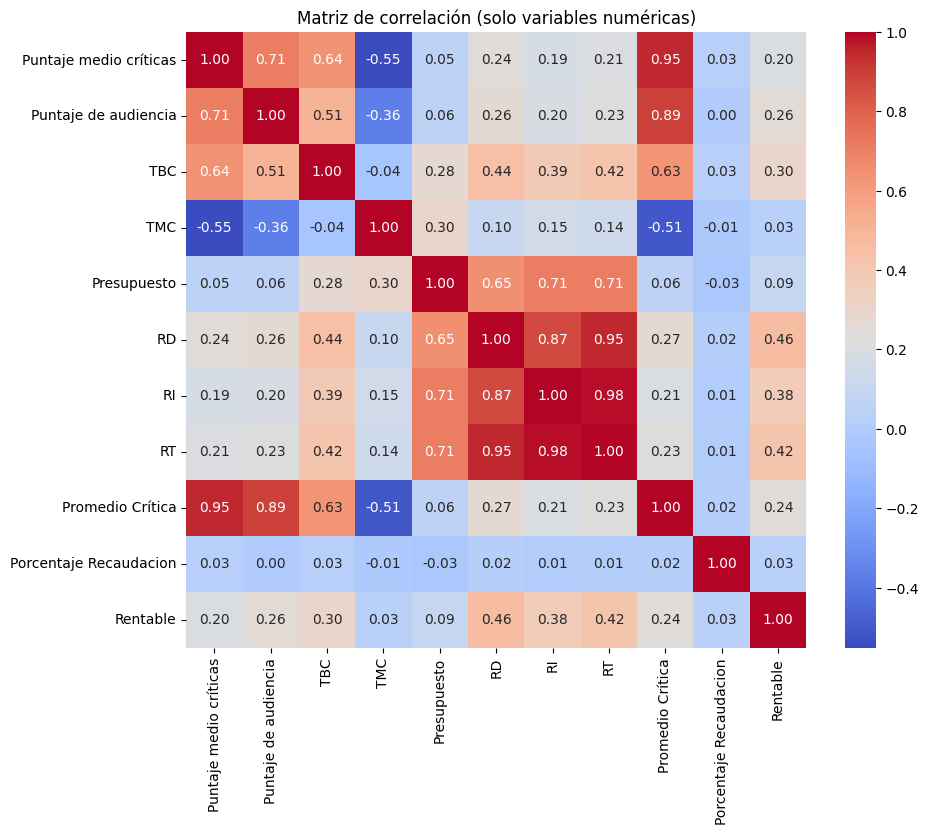

In [70]:
df_numeric = df3.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación (solo variables numéricas)")
plt.show()

Visto que no estoy encontrado una variable que me ayude a ajustar más los datos, hacemos un mapa de calor y vemos que es mejor tomar como variable indpeendiente el total de Buenas Criticas. Ahora probare con el algoritmo probado anteriormente que mejores méticas me dio para poner a prueba la relación entre estás variables.

In [89]:
X= df3[['TBC']]
y= df3['Rentable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión: 0.5617977528089888
              precision    recall  f1-score   support

           0       0.51      0.63      0.57       283
           1       0.62      0.51      0.56       340

    accuracy                           0.56       623
   macro avg       0.57      0.57      0.56       623
weighted avg       0.57      0.56      0.56       623



In [91]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(f"Precisión: {accuracy_score(y_test, y_pred)}")


Precisión: 0.6131621187800963


In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Matriz de confusión:\n{cm}")

Matriz de confusión:
[[191  92]
 [149 191]]


Probando varios algoritmos, llegamos a una mejor precisión con Regresion Logistica pero la matriz de confusión nos muestra que se debe seguir mejorando la predicción para que no genere tantos valores falsos.

In [100]:
from sklearn.metrics import  roc_auc_score


print("AUC-ROC:", roc_auc_score(y_test, modelo.predict_proba(X_test_scaled)[:, 1]))

AUC-ROC: 0.6712793598004574


In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
print(f"Precisión media: {scores.mean()}")

Precisión media: 0.6141897157721428


Finalmente, luego de analizar las métricas, la regresión lineal entre el Total de las Buenas Críticas y Rentable, es el mejor modelo para predecir que se pudo analizar.

Conclusiones:

Es dificil tener una predicción más ajustada cuando nos abstenemos a variables tan subjetivas como los gustos u opiniones de las personas. Considerar que una película sea rentable o no dependerá de muchos más factores, incluso de datos que no exitieron nunca en los datasets originales. Podríamos tener más precisión en determinar otro tipo de hipótesis como por ejemplo, cuánto se puede llegar a recaudarr sí la película tuvo tal presupuesto, sí la protagonizo o dirigio alguien de renombre en determinado punto espacio-temporal, cuál es su género y su porcentaje de buenas críticas. Pero para ello se precisan otros mecanimos de Data Wrangling que nos desvian de nuestra hipótesis inicial. El poroceso que se llevo a cabo es para validar a hipótesis inicial que suponía que tal nivel de crítica definiría la rentabilidad de una película sin tener en cuenta factores tan específicos, por lo que mi conclusión es que la hipótesis no tuvo un buen planteo y que no se llego a un óptimo modelo de predictivo.  